In [3]:
!pip3 install pandas seaborn

  Using cached pandas-1.3.1-cp39-cp39-win_amd64.whl (10.4 MB)
  Using cached seaborn-0.11.1-py3-none-any.whl (285 kB)
  Using cached matplotlib-3.4.2-cp39-cp39-win_amd64.whl (7.1 MB)
  Using cached scipy-1.7.1-cp39-cp39-win_amd64.whl (33.8 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp39-cp39-win_amd64.whl (51 kB)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
match=pd.read_csv('D:\Data Science\IPL\Dataset\matches.csv')

In [6]:
match.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [7]:
delivery=pd.read_csv('D:\Data Science\IPL\Dataset\deliveries.csv')

In [8]:
delivery.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [9]:
#Number of matches
match.shape[0]

636

In [10]:
#Number of seasons
match['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [11]:
#List of all the participating teams
all_teams = match['team1'].tolist() + match['team2'].tolist()
all_teams = list(set(all_teams))
all_teams

['Deccan Chargers',
 'Rising Pune Supergiants',
 'Rajasthan Royals',
 'Mumbai Indians',
 'Sunrisers Hyderabad',
 'Kochi Tuskers Kerala',
 'Chennai Super Kings',
 'Kolkata Knight Riders',
 'Royal Challengers Bangalore',
 'Kings XI Punjab',
 'Gujarat Lions',
 'Pune Warriors',
 'Rising Pune Supergiant',
 'Delhi Daredevils']

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='season', ylabel='count'>

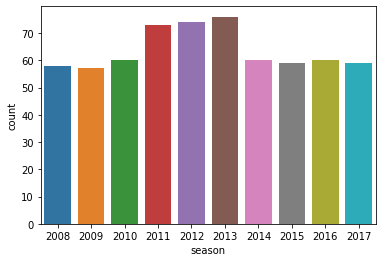

In [13]:
#number of matches per season
match['season'].value_counts()

#graphical view
sns.countplot('season', data=match)

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 [Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
  Text(1, 0, 'Maharashtra Cricket Association Stadium'),
  Text(2, 0, 'Saurashtra Cricket Association Stadium'),
  Text(3, 0, 'Holkar Cricket Stadium'),
  Text(4, 0, 'M Chinnaswamy Stadium'),
  Text(5, 0, 'Wankhede Stadium'),
  Text(6, 0, 'Eden Gardens'),
  Text(7, 0, 'Feroz Shah Kotla'),
  Text(8, 0, 'Punjab Cricket Association IS Bindra Stadium, Mohali'),
  Text(9, 0, 'Green Park'),
  Text(10, 0, 'Punjab Cricket Association Stadium, Mohali'),
  Text(11, 0, 'Sawai Mansingh Stadium'),
  Text(12, 0, 'MA Chidambaram Stadium, Chepauk'),
  Text(13, 0, 'Dr DY Patil Sports Academy'),
  Text(14, 0, 'Newlands'),
  Text(15, 0, "St George's Park"),
  Text(16, 0, 'Kingsmead'),
  Text(17, 0, 'SuperSport Park'),
  Text(18, 0, 'Buffalo Park'),
  Text(19, 0, 'New Wanderers Stadiu

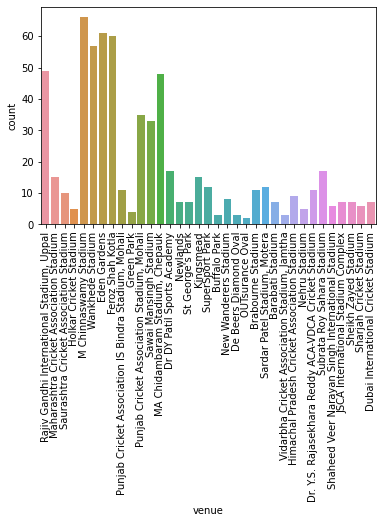

In [14]:
#Number of matches per venue
sns.countplot('venue', data=match)
plt.xticks(rotation='vertical')

<AxesSubplot:>

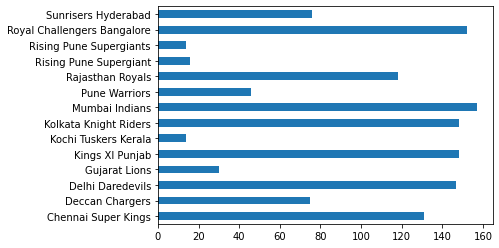

In [16]:
#Matches per team
x = match['team1'].value_counts()
y = match['team2'].value_counts()
(x+y).plot(kind='barh')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants')])

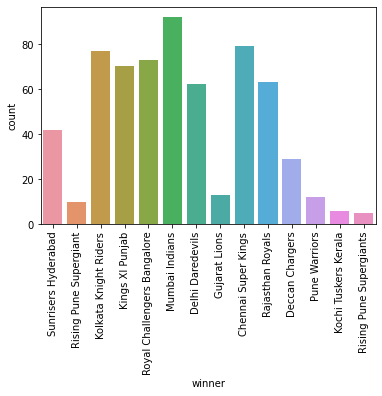

In [17]:
#Match won by each team
sns.countplot('winner', data=match)
plt.xticks(rotation='vertical')

In [19]:
#Each season winner
season_winner=match.drop_duplicates('season', keep='last')
season_winner

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
58,59,2017,Hyderabad,2017-05-21,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi,NaN
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN
456,457,2013,Kolkata,2013-05-26,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel,NaN
516,517,2014,Bangalore,2014-06-01,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN
575,576,2015,Kolkata,2015-05-24,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth,NaN
635,636,2016,Bangalore,2016-05-29,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford,NaN


c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='winner', ylabel='count'>

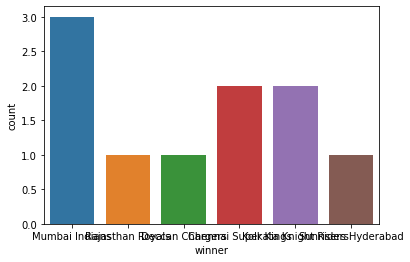

In [20]:
season_winner[['season', 'winner']].sort_values('season')
sns.countplot('winner', data=season_winner)

In [21]:
#About delivery
delivery.shape

(150460, 21)

In [23]:
top_batsman=delivery.groupby('batsman')['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs', ascending=False).head(10)

<AxesSubplot:xlabel='batsman'>

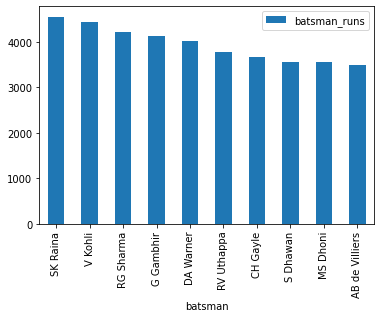

In [24]:
top_batsman.set_index('batsman', inplace=True)
top_batsman.plot(kind='bar')

In [25]:
delivery.groupby('bowler')['noball_runs'].agg('sum').reset_index().sort_values('noball_runs', ascending=False).head(10)

,bowler,noball_runs
276,S Sreesanth,27
121,I Sharma,21
5,A Mishra,20
294,SL Malinga,18
131,JA Morkel,18
139,JJ Bumrah,17
333,UT Yadav,16
309,SW Tait,14
18,AB Dinda,14
180,M Morkel,13


<AxesSubplot:xlabel='batting_team'>

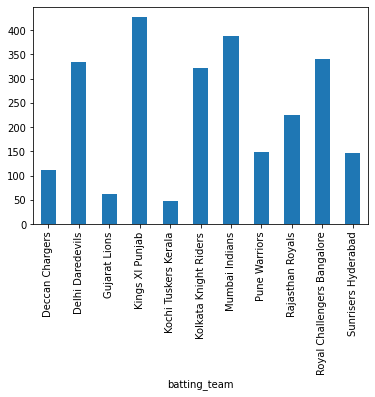

In [26]:
mask=delivery['bowler']=='R Ashwin'
delivery[mask].groupby('batting_team')['total_runs'].agg('sum').plot(kind='bar')

In [27]:
new_match=match[['id', 'season']]

In [29]:
new_match
temp_df=new_match.merge(delivery, left_on='id', right_on='match_id')
temp_df.head()

temp_df.groupby(['season', 'batsman'])['batsman_runs'].agg('sum').reset_index().sort_values('batsman_runs',ascending=False).drop_duplicates('season', keep='first').set_index('season')

,batsman,batsman_runs
season,,
2016,V Kohli,973
2013,MEK Hussey,733
2012,CH Gayle,733
2014,RV Uthappa,660
2017,DA Warner,641
2010,SR Tendulkar,618
2008,SE Marsh,616
2011,CH Gayle,608
2009,ML Hayden,572


In [30]:
mask=delivery['batsman_runs']==4

In [31]:
delivery6=delivery[mask]
delivery6=delivery6[['batting_team','over','batsman_runs']]

In [32]:
x=delivery6.pivot_table(values='batsman_runs', index='batting_team', columns='over', aggfunc='count')

<AxesSubplot:xlabel='over', ylabel='batting_team'>

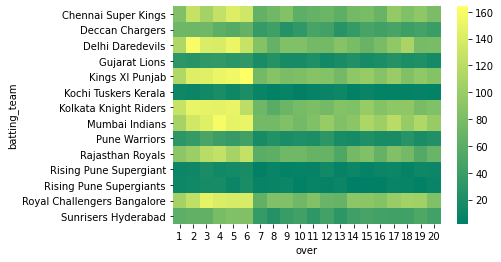

In [33]:
sns.heatmap(x, cmap='summer')

c:\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'caught'),
  Text(1, 0, 'bowled'),
  Text(2, 0, 'run out'),
  Text(3, 0, 'lbw'),
  Text(4, 0, 'caught and bowled'),
  Text(5, 0, 'stumped'),
  Text(6, 0, 'retired hurt'),
  Text(7, 0, 'hit wicket'),
  Text(8, 0, 'obstructing the field')])

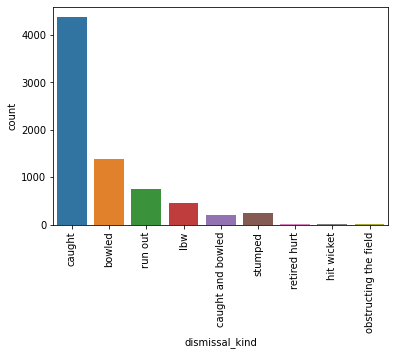

In [35]:
sns.countplot('dismissal_kind', data=delivery)
plt.xticks(rotation='vertical')

In [38]:
mask1=delivery['dismissal_kind']=='caught'
mask2=delivery['dismissal_kind']=='bowled'
mask3=delivery['dismissal_kind']=='lbw'
mask4=delivery['dismissal_kind']=='caught and bowled'
mask5=delivery['dismissal_kind']=='stumped'

new_del=delivery[mask1 | mask2 | mask3 | mask4 | mask5]

<AxesSubplot:xlabel='bowler'>

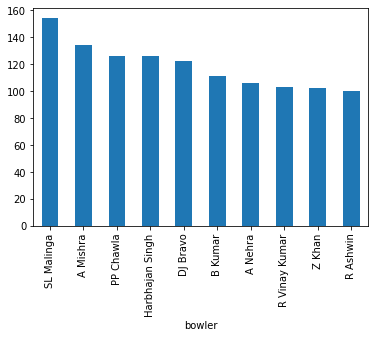

In [39]:
new_del.groupby('bowler')['player_dismissed'].agg('count').sort_values(ascending=False).head(10).plot(kind='bar')

In [40]:
mask=delivery['bowler']=='JJ Bumrah'
mask2=delivery['batsman']=='V Kohli'
delivery[mask].groupby('batsman')['batsman_runs'].agg('count').sort_values(ascending=False)['V Kohli']

46